## Code for calculating PRE profiles from simulations and plotting alonside experimental PRE data ##

The first part of this script uses the trajectory and topology files to calculate the average PRE profile from all-atom simulations and writes out "PRE_sim_" text files. The simulated PRE files contain three rows: [0] = residue number, [1] = calculated PRE ratio, and [2] = calculated PRE ratio assuming Gaussian chain behavior. NB, calculation of PRE profiles requires the custom functions located in this directory. 


The second part of this script reads in the calculated PRE profiles saved in the previous section and plots them on the same axes as the relevant experimental PRE data to generate the top and bottom panels of Figure 2C.

In [2]:
## import packages ##

from soursop.sstrajectory import SSTrajectory
#from soursop.sspre import SSPRE    # NB - this function is broken right now due to a syntax error that I cannot identify
from soursop.ssprotein import SSProtein
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# import custom functions
from SSPRE_etu import SSPRE
from GCPRE_etu import GCPRE


### Section below requires trajectory files; run from text file load cell unless traj in-hand 

In [2]:
## load in the trajectories ##
# full.xtc and full.pdb are the result of merging trajectories from independent replicates
# for the sake of space, they are not included in this analysis repository, but may be found on Zenodo at xyz.com 

print('Loading trajectory...')

TrajOb = SSTrajectory('full.xtc', 'full.pdb')
ProtObj = TrajOb.proteinTrajectoryList[0]

print('Trajectory loaded!')

Loading trajectory...
Trajectory loaded!


In [4]:
## calculate profile for label at residue of interest ##

pre_object = SSPRE(ProtObj, tau_c = 2.4, t_delay = 12, R_2D = 14, W_H = 600e6)

## user input the site of MTSL attachment
# amino acid number in the 'label_position' variable is ONE LESS THAN THE ACTUAL number
label = 63
label_position = label - 1
prof = pre_object.generate_PRE_profile(label_position)[0]

In [5]:
## calculate PRE profile assuming a Gaussian chain ##
## uses the function "GCPRE_etu.py" with inputs:
    ## residue_numbers, label_position, first_res, last_res
    
## NB - this will throw a divide by zero error, but fret not!
    # by virtue of the calculation, the 'self' or 'labeled' residue will always be 
    # a distance of N = 0 monomers away from itself; the PRE profile value for the labeled
    # residue is automatically set to zero :)

gc_profile = GCPRE.GCPRE_profile(idx, label, first_res, last_res)

/work/usher/collab/serf/yeast/pilot/FULL/GCPRE_etu.py:49: RuntimeWarning: invalid value encountered in true_divide
  temp = np.sqrt(n * l * l * (((1 + alpha) / (1 - alpha)) - np.divide(num, denom)))


In [6]:
## uncomment this cell (below) to write out calculated and gaussian-chain PRE profiles to text file

# PRE_out = [idx, prof, gc_profile]

# np.savetxt('PRE_sim_A63C.txt', PRE_out)

### Run from here if PRE_sim files already generated

In [3]:
## read in text files for each MTSL attachment site - exp and simulated ##

A10C_exp = np.loadtxt('PRE_exp_A10C.txt')
A63C_exp = np.loadtxt('PRE_exp_A63C.txt')

A10C_sim = np.loadtxt('PRE_sim_A10C.txt')
A63C_sim = np.loadtxt('PRE_sim_A63C.txt')

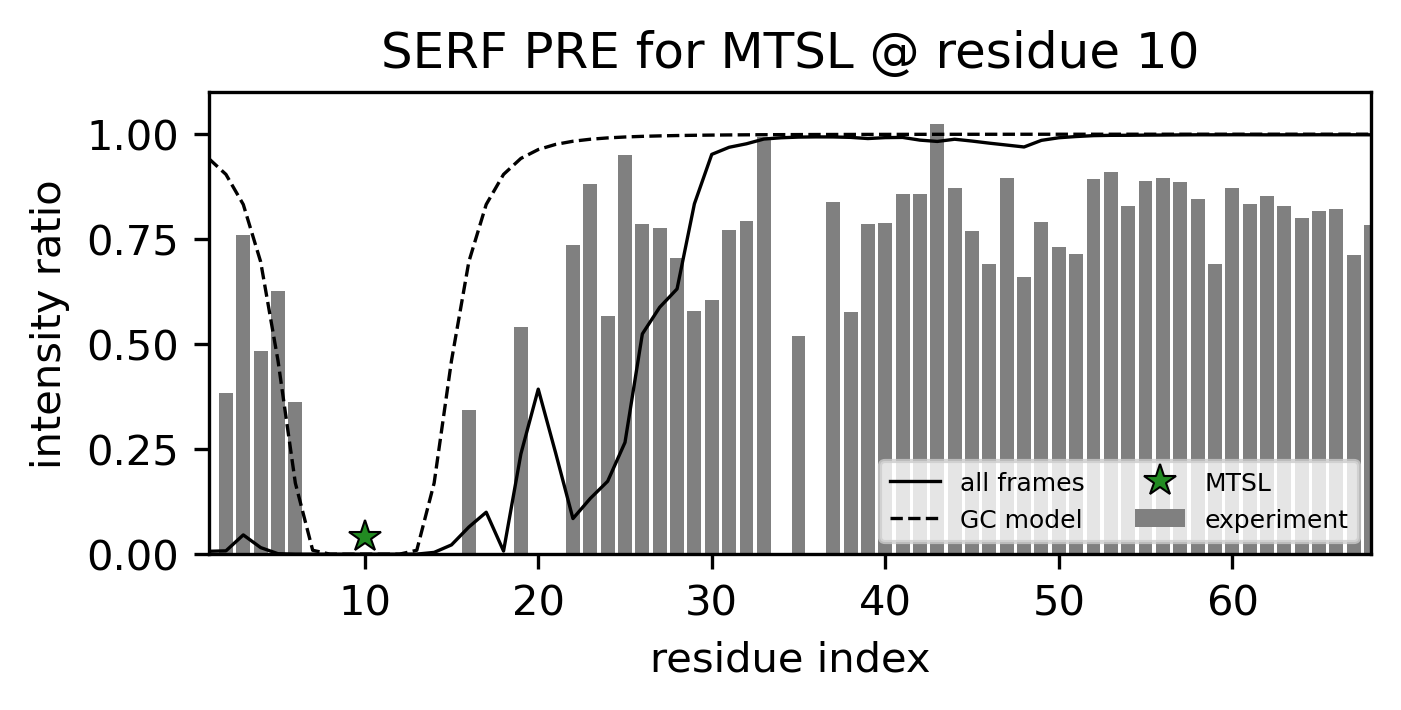

In [17]:
## plot experimental and simulated PRE data -- generates Figure 2C (top) ##

# specify label location:
label1 = 10

plt.figure(figsize = (5, 2), dpi = 300, facecolor = 'w', edgecolor = 'k')

# plot experimental data
plt.bar(A10C_exp[:,0], A10C_exp[:,1], color = 'grey', label = 'experiment')

# plot simulated PRE data
plt.plot(A10C_sim[0], A10C_sim[1], linewidth = 0.8, color = 'k', label = 'all frames')

# plot simulated PRE assuming gaussian chain behavior
plt.plot(A10C_sim[0], A10C_sim[2], color = 'k', linewidth = 0.8, linestyle = '--', label = 'GC model')
plt.plot([label1], 0.04, '*k', markerfacecolor = 'forestgreen', markeredgewidth = 0.5, markersize = 8, label = 'MTSL')

plt.xlim([1, 68])
plt.ylim([0,1.1])

plt.xlabel('residue index')
plt.title('SERF PRE for MTSL @ residue ' +str(label1))
plt.ylabel('intensity ratio')
         
plt.legend(ncol = 2, loc = 'lower right', prop={'size': 6})

# UNCOMMENT below to save figure as PDF
#plt.savefig('Figure_2C_PRE_A10C.pdf', format = 'pdf', dpi = 300)
plt.show()

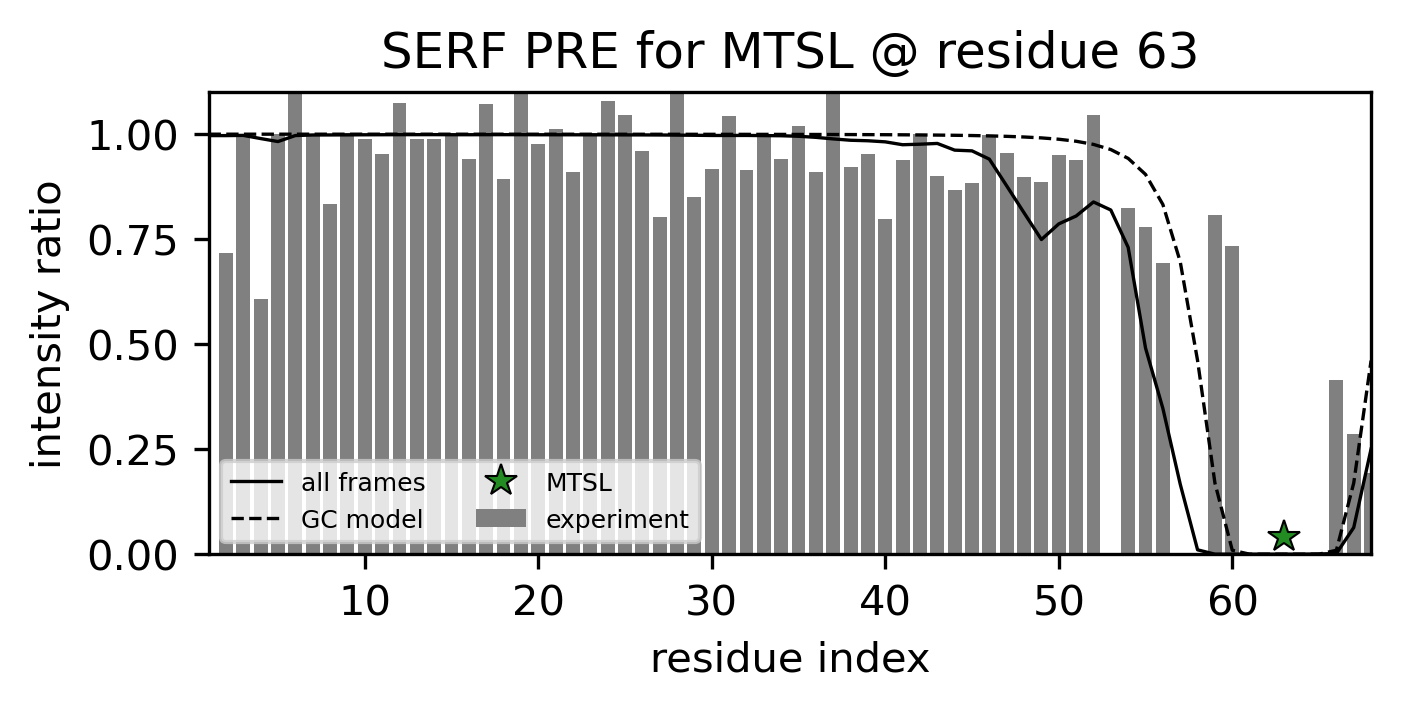

In [18]:
## plot experimental and simulated PRE data -- generates Figure 2C (bottom) ##

# specify label location:
label2 = 63

plt.figure(figsize = (5, 2), dpi = 300, facecolor = 'w', edgecolor = 'k')

# plot experimental data
plt.bar(A63C_exp[:,0], A63C_exp[:,1], color = 'grey', label = 'experiment')

# plot simulated PRE data
plt.plot(A63C_sim[0], A63C_sim[1], linewidth = 0.8, color = 'k', label = 'all frames')

# plot simulated PRE assuming gaussian chain behavior
plt.plot(A63C_sim[0], A63C_sim[2], color = 'k', linewidth = 0.8, linestyle = '--', label = 'GC model')

plt.xlim([1, 68])
plt.ylim([0,1.1])

plt.plot([label2], 0.04, '*k', markerfacecolor = 'forestgreen', markeredgewidth = 0.5, markersize = 8, label = 'MTSL')
plt.xlabel('residue index')
plt.title('SERF PRE for MTSL @ residue ' +str(label2))
plt.ylabel('intensity ratio')
         
plt.legend(ncol = 2, loc = 'lower left', prop={'size': 6})

# UNCOMMENT below to save figure as PDF
#plt.savefig('Figure_2C_PRE_A63C.pdf', format = 'pdf', dpi = 300)
plt.show()